In [1]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [2]:
#Download Dataset
dataset = MNIST(root='data/', download= True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [3]:
#Test Dataset
test_dataset = MNIST(root= 'data/', train= False)
len(test_dataset)

10000

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

Label:  5


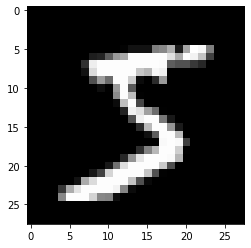

In [5]:
#Print a sample of data
image, label = dataset [0]
plt.imshow(image, cmap= 'gray')
print('Label: ', label)

In [6]:
import torchvision.transforms as transforms

In [7]:
#Preprocessing (Transform image into Tensor)
dataset = MNIST(root='data/',
                train = True,
                transform = transforms.ToTensor())
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [8]:
#Training & Validation set separation
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [9]:
#Load Data

from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle = True)
val_loader = DataLoader(val_ds, batch_size)

In [10]:
#Create model
import torch.nn as nn

input_size = 28 * 28
num_classes = 10

#Logistic Regression Model
model = nn.Linear(input_size, num_classes)

In [11]:
import torch.nn.functional as F

In [12]:
#Create Evaluation Metric

def accuracy(outputs, labels):
  _, preds = torch.max(outputs, dim = 1)
  return torch.tensor(torch.sum(preds == labels).item()/ len(preds))

In [13]:
# Loss Function

loss_fn = F.cross_entropy

In [14]:
#Training the model

def fit(epochs, lr, model, train_loader, val_loader, opt_func = torch.optim.SGD):
  optimizer = opt_func(model.parameters(), lr)
  history = [] #records epoch-wise results

  for epoch in range(epochs):

    #training phase
    for batch in train_loader:
      loss = model.training_step(batch)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

    #Validation phase
    result = evaluate(model, val_loader)
    model.epoch_end(epoch, result)
    history.append(result)
  
  return history

In [15]:
#Evaluation Function by batch

def evaluate(model, val_loader):
  outputs = [model.validation_step(batch) for batch in val_loader]
  return model.validation_epoch_end(outputs)

In [17]:
#Create Model

class MnistModel(nn.Module):
  
  #Constructor
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(input_size, num_classes)

  def forward(self, xb):
    xb = xb.reshape(-1, 784)
    out = self.linear(xb)
    return out

  def training_step(self, batch):
    images, labels = batch
    out = self(images)                    #Generate Predictions
    loss = F.cross_entropy(out, labels)   #Calculate loss
    return loss

  def validation_step(self, batch):
    images, labels = batch
    out = self(images)                    #Generate Predictions
    loss = F.cross_entropy(out, labels)   #Calculate loss
    acc = accuracy(out, labels)
    return {'val_loss': loss, 'val_acc': acc}

  def validation_epoch_end(self, outputs):
    batch_losses = [x['val_loss'] for x in outputs]
    epoch_loss = torch.stack(batch_losses).mean() #Combine losses
    batch_accs = [x['val_acc'] for x in outputs]
    epoch_acc = torch.stack(batch_accs).mean()   #Combine accuracy
    return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

  def epoch_end(self, epoch, result):
    print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

model = MnistModel()


In [31]:
#Training the model and saving the results
epoch = 100
learning_rate = 0.0001
history1 = fit(epoch, learning_rate, model, train_loader, val_loader)

Epoch [0], val_loss: 1.1982, val_acc: 0.7984
Epoch [1], val_loss: 1.1881, val_acc: 0.7995
Epoch [2], val_loss: 1.1782, val_acc: 0.7997
Epoch [3], val_loss: 1.1686, val_acc: 0.8007
Epoch [4], val_loss: 1.1592, val_acc: 0.8016
Epoch [5], val_loss: 1.1501, val_acc: 0.8027
Epoch [6], val_loss: 1.1411, val_acc: 0.8031
Epoch [7], val_loss: 1.1323, val_acc: 0.8045
Epoch [8], val_loss: 1.1238, val_acc: 0.8051
Epoch [9], val_loss: 1.1154, val_acc: 0.8063
Epoch [10], val_loss: 1.1072, val_acc: 0.8069
Epoch [11], val_loss: 1.0992, val_acc: 0.8080
Epoch [12], val_loss: 1.0913, val_acc: 0.8088
Epoch [13], val_loss: 1.0837, val_acc: 0.8101
Epoch [14], val_loss: 1.0761, val_acc: 0.8107
Epoch [15], val_loss: 1.0688, val_acc: 0.8120
Epoch [16], val_loss: 1.0616, val_acc: 0.8124
Epoch [17], val_loss: 1.0545, val_acc: 0.8136
Epoch [18], val_loss: 1.0476, val_acc: 0.8142
Epoch [19], val_loss: 1.0408, val_acc: 0.8147
Epoch [20], val_loss: 1.0342, val_acc: 0.8152
Epoch [21], val_loss: 1.0277, val_acc: 0.816

Text(0.5, 1.0, 'Accuracy vs No of epochs')

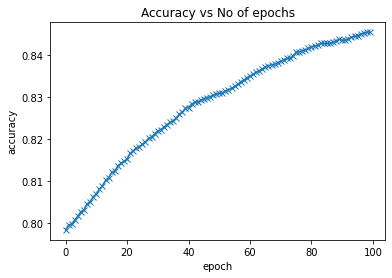

In [32]:
# Plot training progress

history = history1
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs No of epochs')

In [33]:
#Predicting images

def predict_image(img, model):
  xb = img.unsqueeze(0)
  yb = model(xb)
  _, preds = torch.max(yb, dim = 1)
  return preds[0].item()

In [34]:
#Testing with Individual Images
test_dataset = MNIST(root='data/',
                     train = False,
                     transform = transforms.ToTensor())

In [35]:
#Load the test dataset and transform to tensor
test_dataset = MNIST(root='data/',
                     train = False,
                     transform = transforms.ToTensor())

#Evaluate on test data
test_loader = DataLoader(test_dataset, batch_size= 256)
result = evaluate(model, test_loader)
print('Testing Accuracy: ', result['val_acc'], 'Testing Loss: ', result['val_loss'])

Testing Accuracy:  0.849804699420929 Testing Loss:  0.7224603891372681


In [36]:
#Saving trained model (weights and bias)

torch.save(model.state_dict(), 'mnist-logistic.pth')

In [37]:
#Check the model parameter
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0278, -0.0028, -0.0206,  ..., -0.0187, -0.0025,  0.0087],
                      [ 0.0356,  0.0120,  0.0326,  ...,  0.0325, -0.0170,  0.0246],
                      [-0.0308, -0.0133, -0.0193,  ..., -0.0119,  0.0074,  0.0336],
                      ...,
                      [ 0.0168,  0.0322,  0.0283,  ..., -0.0154, -0.0133,  0.0248],
                      [ 0.0184, -0.0003, -0.0172,  ...,  0.0138,  0.0250,  0.0126],
                      [-0.0064,  0.0015,  0.0026,  ..., -0.0098,  0.0007, -0.0259]])),
             ('linear.bias',
              tensor([-0.0111,  0.1135,  0.0120, -0.0060,  0.0231,  0.0585, -0.0141,  0.0231,
                      -0.0753, -0.0307]))])

In [38]:
#Loading the saved model

model2 = MnistModel()
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0278, -0.0028, -0.0206,  ..., -0.0187, -0.0025,  0.0087],
                      [ 0.0356,  0.0120,  0.0326,  ...,  0.0325, -0.0170,  0.0246],
                      [-0.0308, -0.0133, -0.0193,  ..., -0.0119,  0.0074,  0.0336],
                      ...,
                      [ 0.0168,  0.0322,  0.0283,  ..., -0.0154, -0.0133,  0.0248],
                      [ 0.0184, -0.0003, -0.0172,  ...,  0.0138,  0.0250,  0.0126],
                      [-0.0064,  0.0015,  0.0026,  ..., -0.0098,  0.0007, -0.0259]])),
             ('linear.bias',
              tensor([-0.0111,  0.1135,  0.0120, -0.0060,  0.0231,  0.0585, -0.0141,  0.0231,
                      -0.0753, -0.0307]))])

In [39]:
# Check existing model

test_loader = DataLoader(test_dataset, batch_size= 256)
result = evaluate(model2, test_loader)
print('Testing Accuracy: ', result['val_acc'], 'Testing Loss: ', result['val_loss'])

Testing Accuracy:  0.849804699420929 Testing Loss:  0.7224603891372681
